In [1]:
import xarray as xr
import numpy as np
# import pandas as pd
from matplotlib import pyplot as plt
import glob

In [2]:
# from netCDF4 import Dataset
# import os
# folder = r'C:\Users\salla\Onedrive(uoft acc)\OneDrive - University of Toronto\Desktop\School Information\NSERC\PEARL FTIR O3'
# files = glob.glob(folder + r'\*.hdf')
# output_folder = os.path.join(folder, 'netcdf_out')
# os.makedirs(output_folder, exist_ok=True)


# for file in files:
#     with Dataset(file, "r") as f:
#         output_file = os.path.basename(file) + ".nc"
#         cdf_file = os.path.join(output_folder, output_file)
#         with Dataset(cdf_file, "w", format="NETCDF4") as dst:
#             for attr in f.ncattrs():
#                 dst.setncattr(attr, f.getncattr(attr))

#             idx_len = int(str(list(f.dimensions.values())[0]).split()[-1])
#             dst.createDimension("altitude2", 47)
#             dst.createDimension("altitude1", 47)
#             dst.createDimension("single", 1)
#             dst.createDimension("source", 103)
#             dst.createDimension("two", 2)
#             dst.createDimension("idx", idx_len)
#             dst.createDimension("DATETIME", idx_len)

#             altitude1_var = dst.createVariable("altitude1", "i4", ("altitude1",))
#             altitude1_var[:] = f["ALTITUDE"][:]

#             vars = list(f.variables)
#             for var in vars:
#                 cdf_dims = []
#                 dims = f[var].dimensions
#                 if len(dims) > 2:
#                     cdf_dims.append("idx")
#                     cdf_dims.append("altitude1")
#                     cdf_dims.append("altitude2")
#                 else:
#                     for dim in dims:
#                         dim_len = len(f.dimensions[dim])
#                         if dim_len == idx_len:        
#                             cdf_dims.append("idx")
#                         elif dim_len == 2:
#                             cdf_dims.append("two")
#                         elif dim_len == 1:
#                             cdf_dims.append("single")
#                         elif dim_len == 103:
#                             cdf_dims.append("source")
#                         else:
#                             cdf_dims.append("altitude1")
#                 cdf_var = dst.createVariable(var, f[var].datatype, tuple(cdf_dims))
#                 for attr in f[var].ncattrs():
#                     if attr == "_FillValue":
#                         continue
#                     cdf_var.setncattr(attr, f[var].getncattr(attr))
#                 cdf_var[:] = f[var][:]

#             dst["DATETIME"].setncattr("units", "days since 2000-01-01 00:00:00")
#             dst["DATETIME"].setncattr("standard_name", "time")
#             dst["DATETIME"].setncattr("calendar", "standard")

In [3]:
directory = r'C:\Users\salla\Onedrive(uoft acc)\OneDrive - University of Toronto\Desktop\School Information\NSERC\NSERC\PEARL FTIR O3\netcdf_out'

path = directory + r'\*.nc'

nc_list = glob.glob(path)

f = xr.open_mfdataset(
    nc_list,
    combine="nested",
    concat_dim="idx",
    parallel=True,
    decode_cf=True
)

f = f.swap_dims({"idx": "DATETIME"})

f = f.sortby("DATETIME")
f = f.sortby("altitude1")

In [5]:
midpoints = np.mean(f["ALTITUDE.BOUNDARIES"][0].values, axis=0)

f = f.assign_coords(altitude1=('altitude1', midpoints))

In [6]:
O3_vmr = f["O3.MIXING.RATIO.VOLUME_ABSORPTION.SOLAR"] * 1e-6
O3_times = O3_vmr.sel(DATETIME = slice("2006-01-01", "2020-12-31"))
latitude = 80.05
longitude = -86.42
altitude = O3_times["altitude1"].values

In [11]:
O3_vmr.sel(altitude1 = slice(0, 65), method = "nearest").values

NotImplementedError: cannot use ``method`` argument if any indexers are slice objects

In [ ]:
temperature = f["TEMPERATURE_INDEPENDENT"]
pressure = f["PRESSURE_INDEPENDENT"] * 100
k = 1.380649e-23
O3_density = O3_vmr * pressure/(k * temperature)
# vmr - mol o3/mol air
# mol o3/mol air * mol air/vol air = num density = vmr * mol air/vol air = mol o3/vol air in molecules/m^3
# mol air/vol air = N/V
# PV = NkT
# N/V = P/kT
# num density = vmr * N/V = vmr * P/kT
# column = num density*altitude diff

C:\Users\salla\AppData\Local\Temp\ipykernel_4912\722948500.py:13: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for i, ax in enumerate(has_fig.axes.flat):


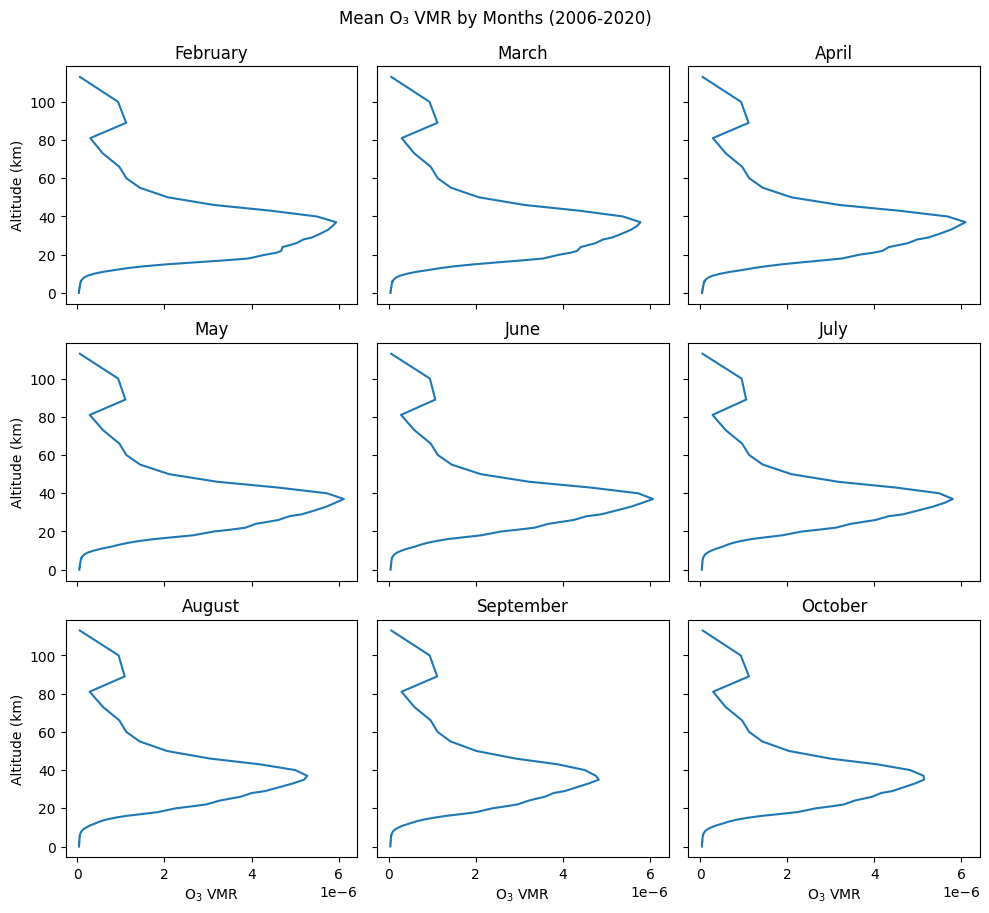

In [ ]:
has_fig = O3_times.groupby("DATETIME.month").mean(dim  = "DATETIME").plot(col = "month", col_wrap = 3, y = "altitude1")
has_fig.fig.axes[0].set_ylabel("Altitude (km)")
has_fig.fig.axes[3].set_ylabel("Altitude (km)")
has_fig.fig.axes[6].set_ylabel("Altitude (km)")
has_fig.fig.axes[6].set_xlabel("O$_3$ VMR")
has_fig.fig.axes[7].set_xlabel("O$_3$ VMR")
has_fig.fig.axes[8].set_xlabel("O$_3$ VMR")

plt.suptitle("Mean O₃ VMR by Months (2006-2020)", y = 1.025)

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, ax in enumerate(has_fig.axes.flat):
    ax.set_title(month_names[i + 1])

title = has_fig.fig._suptitle.get_text()
has_fig.fig.savefig(title, bbox_inches="tight")

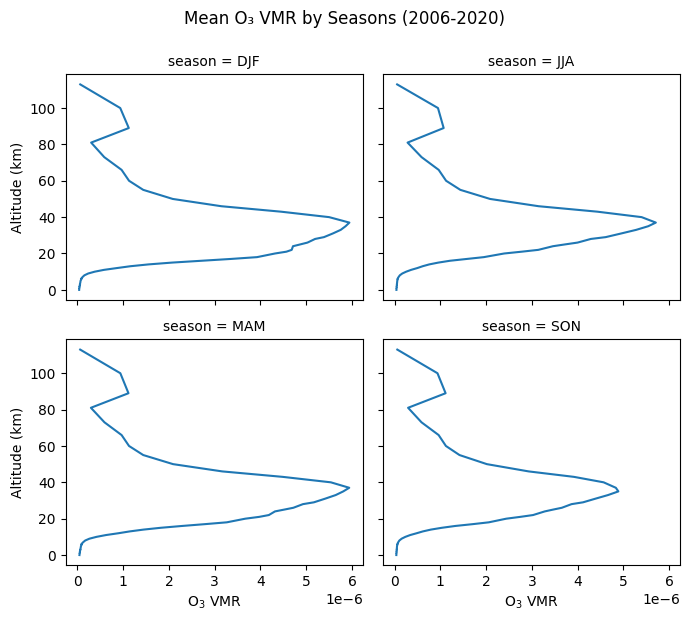

In [ ]:
has_fig = O3_times.groupby("DATETIME.season").mean(dim  = "DATETIME").plot(col = "season", col_wrap = 2, y = "altitude1")
has_fig.fig.axes[0].set_ylabel("Altitude (km)")
has_fig.fig.axes[2].set_ylabel("Altitude (km)")
has_fig.fig.axes[2].set_xlabel("O$_3$ VMR")
has_fig.fig.axes[3].set_xlabel("O$_3$ VMR")

plt.suptitle("Mean O₃ VMR by Seasons (2006-2020)", y = 1.05)

title = has_fig.fig._suptitle.get_text()
has_fig.fig.savefig(title, bbox_inches="tight")

In [ ]:
altitude

array([  0,   1,   1,   2,   2,   3,   3,   4,   5,   6,   6,   7,   8,
         9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  20,  21,  22,
        24,  25,  26,  28,  29,  31,  33,  35,  37,  40,  43,  46,  50,
        55,  60,  66,  73,  81,  89, 100, 113], dtype=int32)

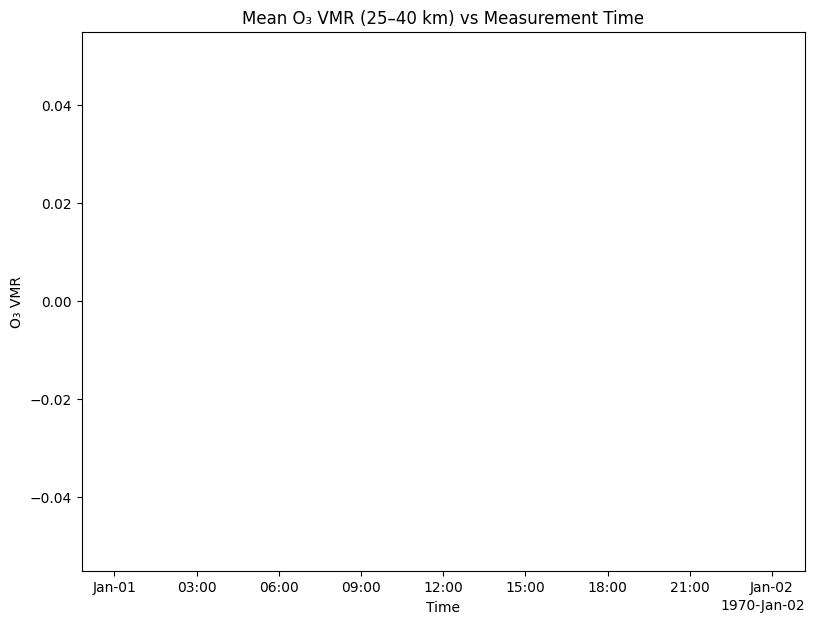

In [ ]:
O3_times.sel(altitude1 = slice(40, 25)).mean(dim = "altitude1").plot(marker = ".", linestyle = "None", size = 7)

plt.ylabel("O₃ VMR")
plt.xlabel("Time")
plt.title("Mean O₃ VMR (25–40 km) vs Measurement Time")

fig = plt.gcf()
axes = plt.gca()

title = axes.get_title()
fig.savefig(title, bbox_inches="tight")

c:\Program Files\Python312\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


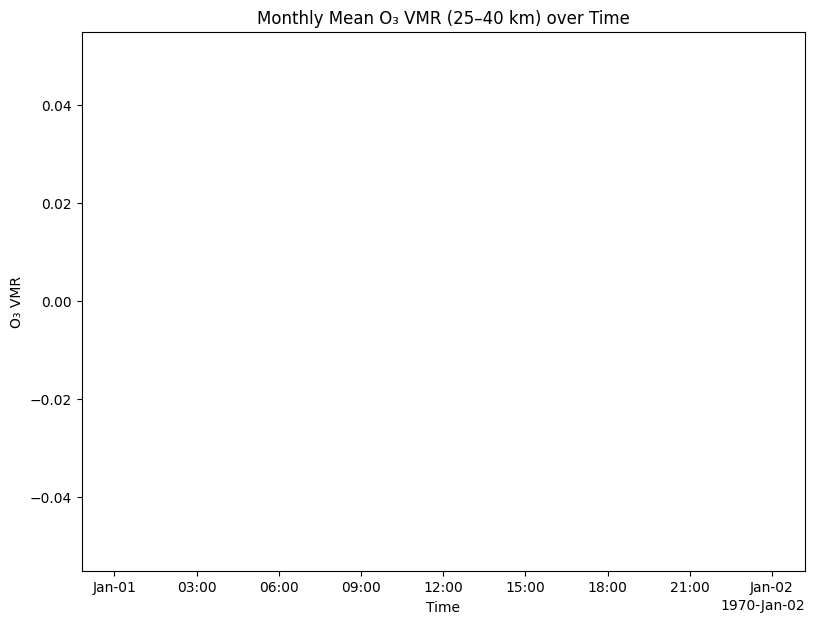

In [ ]:
O3_times.sel(altitude1 = slice(40, 25)).resample(DATETIME = "1M").mean(dim = ["altitude1", "DATETIME"]).plot(marker = ".", linestyle = "None", size = 7)

plt.ylabel("O₃ VMR")
plt.xlabel("Time")
plt.title("Monthly Mean O₃ VMR (25–40 km) over Time")

fig = plt.gcf()
axes = plt.gca()

title = axes.get_title()
fig.savefig(title, bbox_inches="tight")

Text(0.5, 1.0, 'Yearly Mean O₃ VMR (25–40 km) over Time')

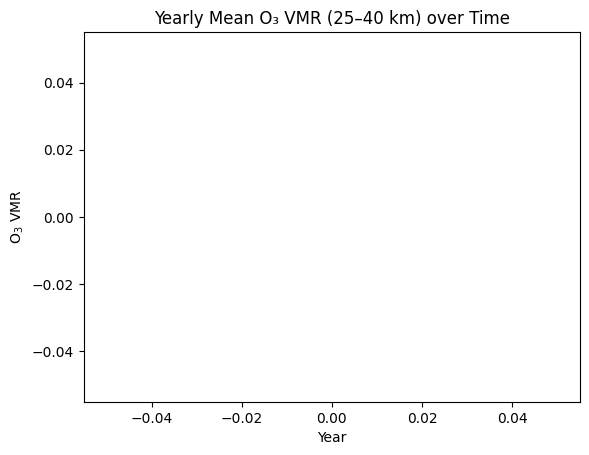

In [ ]:
has_fig = O3_times.sel(altitude1 = slice(40,25)).groupby("DATETIME.year").mean(dim = ["altitude1", "DATETIME"]).plot(linestyle = "None", marker = ".")
plt.xlabel("Year")
plt.ylabel("O$_3$ VMR")
plt.title("Yearly Mean O₃ VMR (25–40 km) over Time")
# .sel(altitude1 = slice(25,40))
# .groupby("DATETIME.year")
# .mean(dim = ["altitude1", "DATETIME"])
# .plot()
# has_fig.values
# .plot()
# altitude

In [ ]:
alt_boundaries = f["ALTITUDE.BOUNDARIES"][0]
lower_alt_bounds = alt_boundaries[1]
upper_alt_bounds = alt_boundaries[0]
alt_boundary_diffs = (upper_alt_bounds - lower_alt_bounds)
lower_alt_bounds = alt_boundaries[1].values
upper_alt_bounds = alt_boundaries[0].values

min_alt = 0
max_alt = 130
min_alt_bound = np.argmin(altitude)
max_alt_bound = np.argmax(altitude)
min_proportion = 0
max_proportion = 0
bottom_alt_bound = np.argmin(altitude)
top_alt_bound = np.argmax(altitude)
no_column = False

_min_lower_bounds = min(lower_alt_bounds)
_max_upper_bounds = max(upper_alt_bounds)

for i, (lower_bound, upper_bound) in enumerate(zip(lower_alt_bounds, upper_alt_bounds)):
    bound_diff = alt_boundary_diffs[i]
    if min_alt < _min_lower_bounds:
        pass
    elif lower_bound <= min_alt <= upper_bound:
        min_bound = upper_bound
        bottom_alt_bound = i-1
        min_proportion = (upper_bound - min_alt) / bound_diff
        min_alt_bound = i
    elif min_alt > _max_upper_bounds:
        no_column = True
        break
    if max_alt > _max_upper_bounds:
        pass
    elif lower_bound <= max_alt <= upper_bound:
        max_alt_bound = i
        top_alt_bound = i+1
        max_bound = lower_bound
        max_proportion = (max_alt - lower_bound) / bound_diff
    elif max_alt < _min_lower_bounds:
        no_column = True
        break

_top_slice = slice(max_alt_bound, top_alt_bound + 1)
_middle_slice = slice(min_alt_bound, max_alt_bound + 1)
_bottom_slice = slice(bottom_alt_bound, min_alt_bound + 1)

O3_column_top = (O3_density.isel(altitude1 = _top_slice) * alt_boundary_diffs.isel(altitude1 = _top_slice)) * max_proportion * 1000
O3_column = O3_density.isel(altitude1 = _middle_slice) * alt_boundary_diffs.isel(altitude1 = _middle_slice) * 1000
O3_column_bottom = (O3_density.isel(altitude1 = _bottom_slice) * alt_boundary_diffs.isel(altitude1 = _bottom_slice)) * min_proportion * 1000

_dim_name = "altitude1"
O3_partial_column = (O3_column_top.sum(dim = _dim_name) + O3_column.sum(dim = _dim_name) + O3_column_bottom.sum(dim = _dim_name)).where(not no_column, 0)

_conversion_factor = 2.687e20
O3_partial_column_DU = O3_partial_column / _conversion_factor

In [8]:
O3_partial_column_DU.values

NameError: name 'O3_partial_column_DU' is not defined

In [9]:
np.nansum(O3_partial_column_DU.values - (f["O3.COLUMN_ABSORPTION.SOLAR"].values * 10000 / 2.687e20)) / 6580

NameError: name 'O3_partial_column_DU' is not defined

In [10]:
year = "2009"
O3_partial_column_DU.sel(DATETIME = slice(year + "-01-01", year + "-12-31")).plot()
# linestyle = "None", marker = "."

NameError: name 'O3_partial_column_DU' is not defined